In [ ]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 모델불러오기

In [ ]:
#남자 vs 여자
from keras.models import load_model
manORwoman = load_model('/content/drive/MyDrive/데이터저장/모델저장/이걸로하기man or woman epoch 추가데이터 30, batch=48 teps=70 val=50.h5')

In [ ]:
#인간 vs 동물 vs 애니
from keras.models import load_model
humanORanimalORanime = load_model('/content/drive/MyDrive/데이터저장/모델저장/애니vs인간vs동물.h5')

In [ ]:
#고양이 강아지
from keras.models import load_model
catORdog = load_model('/content/drive/MyDrive/데이터저장/모델저장/강아지vs고양이.h5')

In [ ]:
#인종
humanrace=load_model('/content/drive/MyDrive/데이터저장/모델저장/인종분류1.h5')

In [ ]:
#고양이 14종 분류
catbreed=load_model('/content/drive/MyDrive/데이터저장/모델저장/고양이 종 분류.h5')

In [ ]:
#어린이vs어른
adultORchildren = load_model('/content/drive/MyDrive/데이터저장/모델저장/어린이vs어른.h5')

In [ ]:
#강아지 70종 분류
dogbreed = load_model('/content/drive/MyDrive/데이터저장/모델저장/강아지 70종 분류.h5')

In [ ]:
#마스크 착용 분류
mask_classification = load_model('/content/drive/MyDrive/데이터저장/모델저장/마스크 착용 분류.h5')

# 분류하기

In [ ]:
img_width=250
img_height=250

In [ ]:
#list정리
list1=['animal','anime','human']
list2=['asian','caucasian','indian','negroids']
cat_name=['Abyssinian','Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Dilute_Calico', 'Egyptian_Mau', 'Havana', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'Tuxedo']
dog_name=['Labrador', 'Great Perenees', 'Rottweiler', 'Schnauzer', 'Labradoodle', 'Greyhound', 'Boxer', 'African Wild Dog', 'Saint Bernard', 'Clumber', 'Siberian Husky', 'Bulldog', 'Irish Wolfhound', 'Doberman', 'Bearded Collie', 'Pug', 'Cocker', 'Bull Terrier', 'Beagle', 'Bluetick', 'Dhole', 'Vizsla', 'Blenheim', 'Komondor', 'Yorkie', 'Maltese', 'Bermaise', 'Shar_Pei', 'American Spaniel', 'Irish Spaniel', 'Bloodhound', 'American Hairless', 'Dalmation', 'Basset', 'Basenji', 'Scotch Terrier', 'Great Dane', 'French Bulldog', 'Japanese Spaniel', 'Dingo', 'Bichon Frise', 'Pekinese', 'Golden Retriever', 'Border Collie', 'Pit Bull', 'Shih-Tzu', 'Shiba Inu', 'Chihuahua', 'Borzoi', 'Cockapoo', 'Newfoundland', 'Bull Mastiff', 'Chow', 'Airedale', 'Poodle', 'Afghan', 'German Sheperd', 'Malinois', 'Groenendael', 'Chinese Crested', 'Corgi', 'Pomeranian', 'Boston Terrier', 'Coyote', 'Lhasa', 'Elk Hound', 'Collie', 'Rhodesian', 'Mex Hairless', 'Cairn']
mask_list=['mask_weared_incorrect','with_mask','without_mask']

In [ ]:
import cv2
import glob
def result(img):
  test_img_list=[]
  test_img_list_150=[]
  test_img_name_list=glob.glob(img)

  img = cv2.imread(img, cv2.IMREAD_COLOR)

  #250
  img = cv2.resize(img, dsize=(img_width, img_height)) #사이즈 250
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img / 255.0

  test_img_list.append(img)#250

  humanORanimalORanime_pred=humanORanimalORanime.predict(np.array(test_img_list)) # 인간 vs 동물 vs 애니
  humanORanimalORanime_prediction=str(list1[np.argmax(humanORanimalORanime_pred[0])]) # 인간 vs 동물 vs 애니


  plt.figure(figsize=(6,6))

  if(humanORanimalORanime_prediction=='human'): # 인간
    manORwoman_pred=manORwoman.predict(np.array(test_img_list)) # 남자 vs 여자

    humanrace_pred=humanrace.predict(np.array(test_img_list)) #인종 분류
    humanrace_prediction=str(list2[np.argmax(humanrace_pred[0])]) #인종 분류

    adultORchildren_pred = adultORchildren.predict(np.array(test_img_list)) # 어린이 vs 어른

    mask_pred = mask_classification.predict(np.array(test_img_list)) # 마스크 분류
    mask_prediction = str(mask_list[np.argmax(mask_pred[0])]) # 마스크 분류


    if(manORwoman_pred>=0.5): # 남자 vs 여자
      if(adultORchildren_pred>=0.5): #어린이 vs 어른
        title_str='human and woman and child' + ", " + humanrace_prediction + ", " + mask_prediction
        plt.title(title_str)
      else: #어린이 vs 어른
        title_str='human and woman and adult' + ", " + humanrace_prediction + ", " + mask_prediction
        plt.title(title_str)
    else: #남자 vs 여자
      if(adultORchildren_pred>=0.5): #어린이 vs 어른
        title_str='human and man and child' + ", " + humanrace_prediction + ", " + mask_prediction
        plt.title(title_str)
      else: #어린이 vs 어른
        title_str='human and man and adult' + ", " + humanrace_prediction + ", " + mask_prediction
        plt.title(title_str)

  elif(humanORanimalORanime_prediction=='animal'): # 동물
    catORdog_pred=catORdog.predict(np.array(test_img_list)) #고양이 vs 강아지

    if(catORdog_pred[0][0]>=0.5): #고양이
      cat_pred=catbreed.predict(np.array(test_img_list)) #고양이 종 분류
      cat_prediction=str(cat_name[np.argmax(cat_pred[0])]) #고양이 종 분류
      title_str='animal and cat' + ', ' + cat_prediction
      plt.title(title_str)
    else: #강아지
      dog_pred = dogbreed.predict(np.array(test_img_list)) # 강아지 종 분류
      dog_prediction = str(dog_name[np.argmax(dog_pred[0])]) # 강아지 종 분류
      title_str='animal and dog' + ', ' + dog_prediction
      plt.title(title_str)

  elif(humanORanimalORanime_prediction=='anime'): #만화캐릭터
    title_str=humanORanimalORanime_prediction
    plt.title(title_str)

  plt.imshow(img)
  plt.axis('off')

plt.show()

1/1 [==============================] - 0s 280ms/step


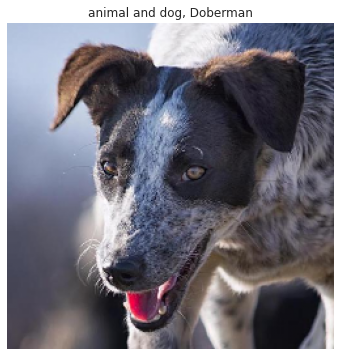

In [ ]:
img='/content/pixabay_dog_001985.jpg'
save_img=result(img)
save_img

1/1 [==============================] - 0s 324ms/step


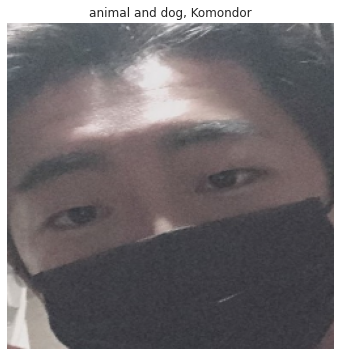

In [ ]:
img='/content/성원.jpg'
save_img=result(img)
save_img

1/1 [==============================] - 2s 2s/step


1/1 [==============================] - 0s 238ms/step


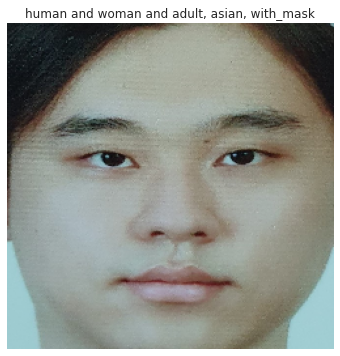

In [21]:
img='/content/사람/정희준1.jpg'
save_img=result(img)
save_img

1/1 [==============================] - 0s 51ms/step


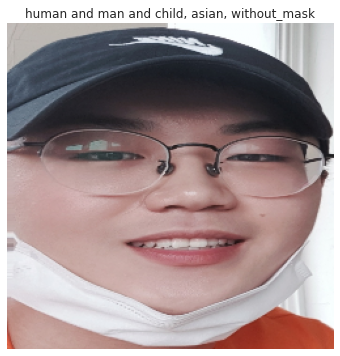

In [ ]:
img='/content/종인폴더/종인 턱스크2.jpg'
save_img=result(img)
save_img

1/1 [==============================] - 0s 305ms/step


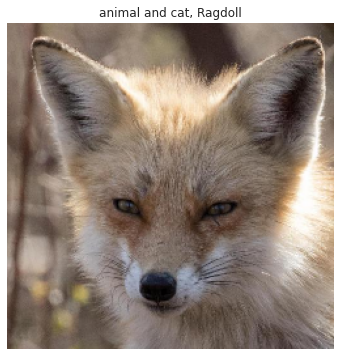

In [ ]:
img='/content/flickr_wild_000257.jpg'
save_img=result(img)
save_img

In [23]:
dir= '/content/사람'
dir_list= os.listdir(dir)

for i in dir_list:
  img='/content/사람/{}'.format(i)
  save_img=result(img)
  save_img

Output hidden; open in https://colab.research.google.com to view.

1/1 [==============================] - 0s 300ms/step


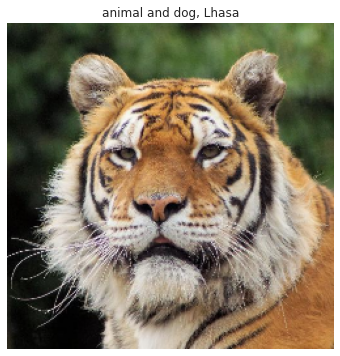

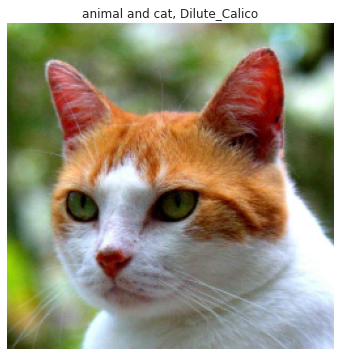

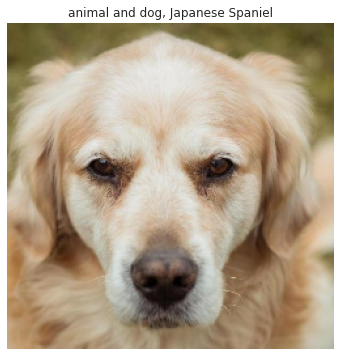

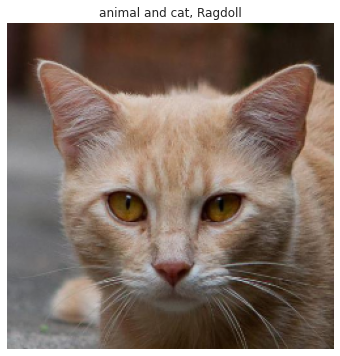

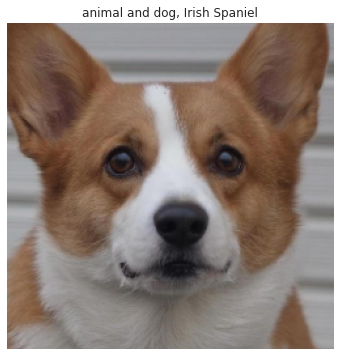

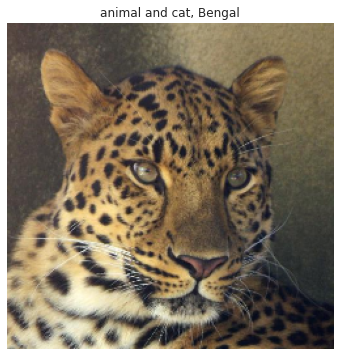

In [ ]:
dir= '/content/동물'
dir_list= os.listdir(dir)

for i in dir_list:
  img='/content/동물/{}'.format(i)
  save_img=result(img)
  save_img

1/1 [==============================] - 1s 1s/step


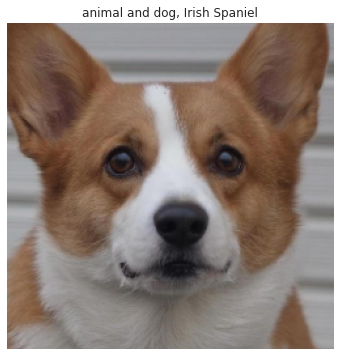

In [ ]:
img='/content/동물/강아지1.jpg'
save_img=result(img)
save_img

1/1 [==============================] - 0s 178ms/step


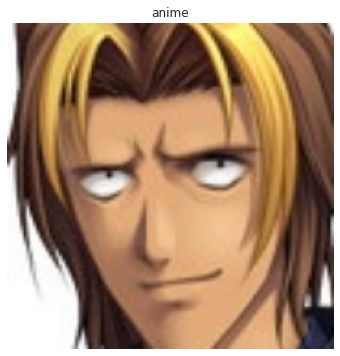

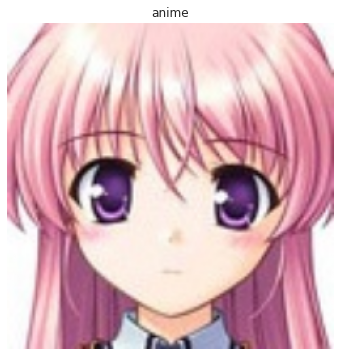

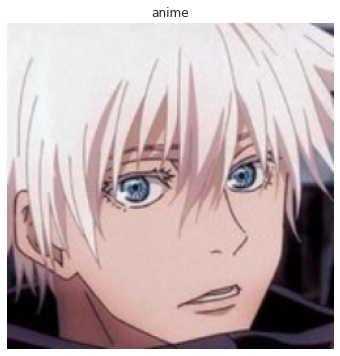

In [ ]:
dir= '/content/캐릭터'
dir_list= os.listdir(dir)

for i in dir_list:
  img='/content/캐릭터/{}'.format(i)
  save_img=result(img)
  save_img

In [22]:
1+4

5